# Class defs

Esta tabla contiene la información de las definiciones de clases.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('classdefs')

# Table name, features and target.
TABLE_NAME = 'classdefs'
TABLE_FEATURES = ['classdef__name_convention', 'classdef__is_enum_class', 'classdef__number_of_characters', 'classdef__number_of_decorators', 'classdef__number_of_methods', 'classdef__number_of_base_classes', 'classdef__has_generic_type_annotations', 'classdef__has_doc_string', 'classdef__body_count', 'classdef__assignments_pct', 'classdef__expressions_pct', 'classdef__uses_meta_class', 'classdef__number_of_keywords', 'classdef__height', 'classdef__average_stmts_method_body', 'classdef__type_annotations_pct', 'classdef__private_methods_pct', 'classdef__magic_methods_pct', 'classdef__async_methods_pct', 'classdef__class_methods_pct', 'classdef__static_methods_pct', 'classdef__abstract_methods_pct', 'classdef__property_methods_pct', 'classdef__expertise_level']
TABLE_TARGET = 'classdef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-07-03 22:50:41.348445 Data cache files found ...
2024-07-03 22:50:41.366460 Data cache files successfully loaded!!
Features shape: (22324, 24)
Target shape: (22324,)
As we can see the downloaded data contains a total of 22324 instances. For each instance we have 24 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324 entries, 0 to 22323
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   classdef__name_convention               22324 non-null  object 
 1   classdef__is_enum_class                 22324 non-null  bool   
 2   classdef__number_of_characters          22324 non-null  int64  
 3   classdef__number_of_decorators          22324 non-null  int64  
 4   classdef__number_of_methods             22324 non-null  int64  
 5   classdef__number_of_base_classes        22324 non-null  int64  
 6   classdef__has_generic_type_annotations  22324 non-null  bool   
 7   classdef__has_doc_string                22324 non-null  bool   
 8   classdef__body_count                    22324 non-null  int64  
 9   classdef__assignments_pct               22324 non-null  float64
 10  classdef__expressions_pct               22324 non-null  fl

Cómo podemos ver la tabla está compuesta por 18 variables numéricas, 4 variables boleanas y dos de tipo objeto. 

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 34.74% instances for BEGINNER class and 65.26% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

classdef__name_convention                 0
classdef__is_enum_class                   0
classdef__number_of_characters            0
classdef__number_of_decorators            0
classdef__number_of_methods               0
classdef__number_of_base_classes          0
classdef__has_generic_type_annotations    0
classdef__has_doc_string                  0
classdef__body_count                      0
classdef__assignments_pct                 0
classdef__expressions_pct                 0
classdef__uses_meta_class                 0
classdef__number_of_keywords              0
classdef__height                          0
classdef__average_stmts_method_body       0
classdef__type_annotations_pct            0
classdef__private_methods_pct             0
classdef__magic_methods_pct               0
classdef__async_methods_pct               0
classdef__class_methods_pct               0
classdef__static_methods_pct              0
classdef__abstract_methods_pct            0
classdef__property_methods_pct  

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [5]:
print_empty_cols(X)

classdef__name_convention
-------------------------
0 instancias no tienen un valor para la columna classdef__name_convention


classdef__is_enum_class
-----------------------
0 instancias no tienen un valor para la columna classdef__is_enum_class


classdef__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_characters


classdef__number_of_decorators
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_decorators


classdef__number_of_methods
---------------------------
0 instancias no tienen un valor para la columna classdef__number_of_methods


classdef__number_of_base_classes
--------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_base_classes


classdef__has_generic_type_annotations
--------------------------------------
0 instancias no tienen un valor para la columna classdef__has_generic_type_annotations


classdef__has_

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classdef__name_convention,22324,7,CamelUp,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__is_enum_class,22324,2,False,22026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__number_of_characters,22324.0,NaN,NaN,NaN,13.938855,6.639526,1.0,9.0,13.0,18.0,52.0
classdef__number_of_decorators,22324.0,NaN,NaN,NaN,0.142358,0.377525,0.0,0.0,0.0,0.0,5.0
classdef__number_of_methods,22324.0,NaN,NaN,NaN,4.139939,6.456491,0.0,1.0,2.0,5.0,231.0
classdef__number_of_base_classes,22324.0,NaN,NaN,NaN,0.830631,0.613377,0.0,1.0,1.0,1.0,45.0
classdef__has_generic_type_annotations,22324,1,False,22324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__has_doc_string,22324,2,False,11583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__body_count,22324.0,NaN,NaN,NaN,5.749015,8.558907,1.0,2.0,3.0,7.0,618.0
classdef__assignments_pct,22324.0,NaN,NaN,NaN,0.157706,0.298851,0.0,0.0,0.0,0.181818,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "classdef__number_of_characters": [(0.0, 9.0), (9.0, 13.0), (13.0, 18.0), (18.0, inf)], # min: 1 ; max: 52
    "classdef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 5
    "classdef__number_of_methods": [(0.0, 1.0), (1.0, 2.0), (2.0, 5.0), (5.0, inf)], # min: 0 ; max: 231
    "classdef__number_of_base_classes": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)], # min: 0 ; max: 45
    "classdef__body_count": [(0.0, 2.0), (2.0, 3.0), (3.0, 7.0), (7.0, inf)], # min: 1 ; max: 618
    "classdef__assignments_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__expressions_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__number_of_keywords": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 2.0
    "classdef__height": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 1.0 ; max: 8.0
    "classdef__average_stmts_method_body": [(0.0, 1.0), (1.0, 2.2), (2.2, 4.0), (4.0, inf)], # min: 0.0 ; max: 114.0
    "classdef__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__private_methods_pct": [(0.0, 0.0), (0.0, 0.25), (0.25, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__magic_methods_pct": [(0.0, 0.0), (0.0, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__async_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__class_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__static_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__abstract_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__property_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['classdef__number_of_characters'], 10))
print(get_statistics(X_copy, ['classdef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['classdef__number_of_methods'], 10))
print(get_statistics(X_copy, ['classdef__number_of_base_classes'], 10))
print(get_statistics(X_copy, ['classdef__body_count'], 10))
print(get_statistics(X_copy, ['classdef__assignments_pct'], 10))
print(get_statistics(X_copy, ['classdef__expressions_pct'], 10))
print(get_statistics(X_copy, ['classdef__number_of_keywords'], 10))
print(get_statistics(X_copy, ['classdef__height'], 10))
print(get_statistics(X_copy, ['classdef__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['classdef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['classdef__private_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__magic_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__async_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__class_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__static_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__abstract_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__property_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__name_convention'], 10))
print(get_statistics(X_copy, ['classdef__is_enum_class'], 10))
print(get_statistics(X_copy, ['classdef__has_generic_type_annotations'], 10))
print(get_statistics(X_copy, ['classdef__has_doc_string'], 10))
print(get_statistics(X_copy, ['classdef__uses_meta_class'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['classdef__assignments_pct', 'classdef__expressions_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
classdef__number_of_characters  count  percentage
                    [18.0_inf]   6096   27.306934
                   [13.0_18.0)   6001   26.881383
                    [9.0_13.0)   5564   24.923849
                     [0.0_9.0)   4663   20.887834

classdef__number_of_decorators  count  percentage
                     [0.0_0.0]  19341   86.637699
                     [0.0_inf]   2983   13.362301

classdef__number_of_methods  count  percentage
                  [2.0_5.0)   8279   37.085648
                  [5.0_inf]   6124   27.432360
                  [0.0_1.0)   4290   19.216986
                  [1.0_2.0)   3631   16.265006

classdef__number_of_base_classes  count  percentage
                       [1.0_1.0]  16367   73.315714
                       [0.0_0.0]   5003   22.410858
                       [1.0_inf]    954    4.273428

classdef__body_count  count  percentage
           [3.0_7.0)   8214   36.794481
           [7.0_inf]   5745   25.734635
          

### IMPORTANTE
7900 clases sin asignaciones ni expresiones. Serán prints? Hay que mirarlo en detalle

No hay generic type annotations -> Esta disponible solo desde Python 3.12?

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (22324, 31)
Target shape: (22324,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

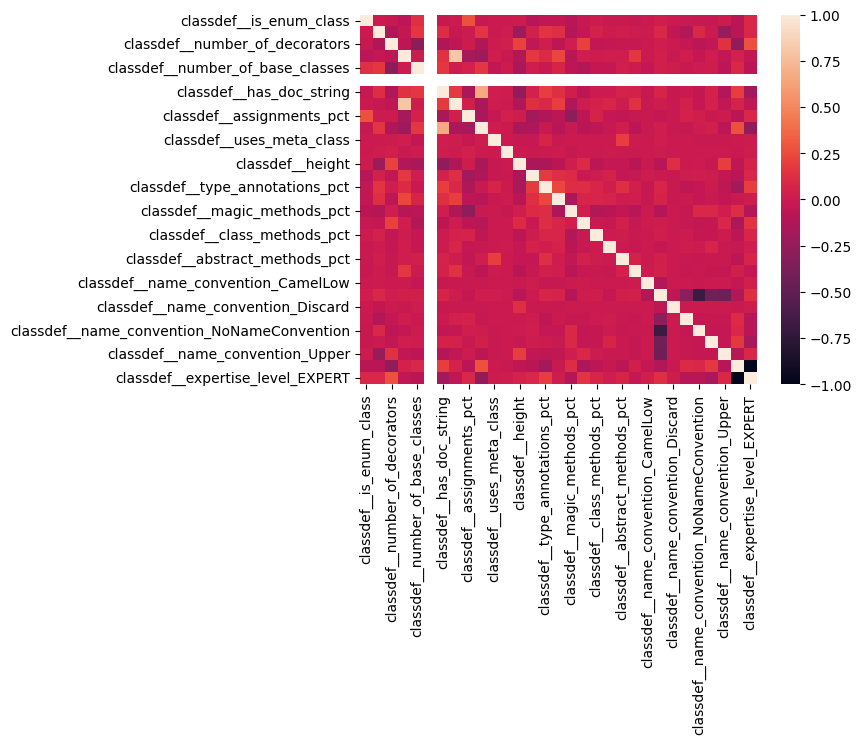

In [9]:
sns.heatmap(X.corr(), annot=False)

### IMPORTANTE
La relación entre private y magic methods pct es debido a que hasta ahora siempre que un metodo era magic se marcaba como privado tambien

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 23 variables (8 numericas, 10 procentuales, 4 booleanas y 1 categorica)

### Variable is_enum_class (1/23)
Esta variable es de tipo booleano y representa si la clase hereda de la clase Enum.

<Axes: xlabel='classdef__is_enum_class', ylabel='Count'>

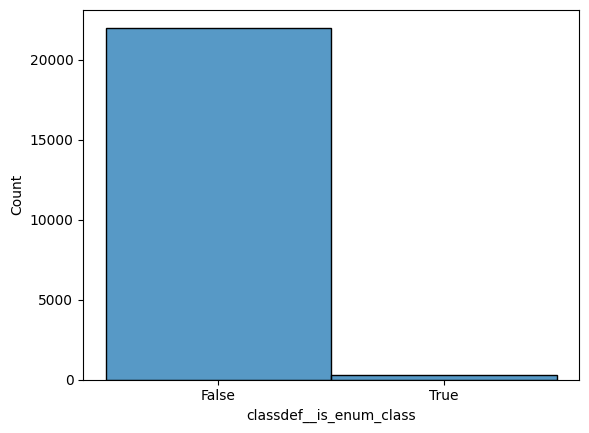

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__is_enum_class'], discrete=True)

In [11]:
num_true_values = len(X[X['classdef__is_enum_class'] == True])
num_false_values = len(X[X['classdef__is_enum_class'] == False])
std = X['classdef__is_enum_class'].std()
freq_true = len(X[X['classdef__is_enum_class'] == True]) / len(X['classdef__is_enum_class'])
freq_false = len(X[X['classdef__is_enum_class'] == False]) / len(X['classdef__is_enum_class'])
print(f'La variable is_enum_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a False es {freq_false}.')

La variable is_enum_class contiene 298 valores verdaderos y 22026 valores falsos. Y, la desviación típica es de 0.11476611346006393
La frecuencia con la que programa puede tener la variable is_enum_class a True es 0.013348862211073285.
La frecuencia con la que programa puede tener la variable is_enum_class a False es 0.9866511377889268.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__is_enum_class', possible_values)

La variable classdef__is_enum_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__is_enum_class toma el valor de 0.0 en un 98.67% de los items.
La variable classdef__is_enum_class toma el valor de 1.0 en un 1.335% de los items.


In [13]:
X[X['classdef__is_enum_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,298.0,298.000000,298.000000,298.000000,298.000000,298.0,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.0,298.000000,298.0,298.0,298.000000,298.0,298.000000,298.0,298.0
mean,1.0,13.614094,0.070470,0.197987,1.526846,0.0,0.399329,5.419463,0.857084,0.103867,...,0.013423,0.0,0.963087,0.0,0.0,0.010067,0.0,0.026846,0.0,1.0
std,0.0,6.013627,0.269181,0.772679,0.500119,0.0,0.490584,5.452756,0.204797,0.150827,...,0.115270,0.0,0.188865,0.0,0.0,0.099997,0.0,0.161904,0.0,0.0
min,1.0,3.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
25%,1.0,9.000000,0.000000,0.000000,1.000000,0.0,0.000000,3.000000,0.750000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
50%,1.0,13.000000,0.000000,0.000000,2.000000,0.0,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
75%,1.0,17.000000,0.000000,0.000000,2.000000,0.0,1.000000,6.000000,1.000000,0.237500,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
max,1.0,34.000000,2.000000,8.000000,2.000000,0.0,1.000000,41.000000,1.000000,0.600000,...,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,1.0


### Variable has_generic_type_annotations (2/23)
Esta variable es de tipo booleano y representa si la clase define un tipo genérico

<Axes: xlabel='classdef__has_generic_type_annotations', ylabel='Count'>

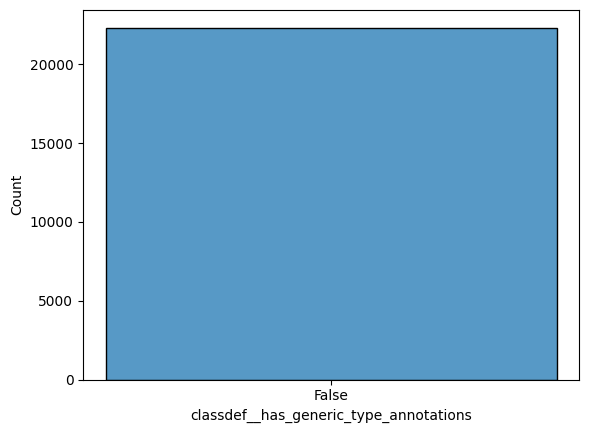

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_generic_type_annotations'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_generic_type_annotations'] == True])
num_false_values = len(X[X['classdef__has_generic_type_annotations'] == False])
std = X['classdef__has_generic_type_annotations'].std()
freq_true = len(X[X['classdef__has_generic_type_annotations'] == True]) / len(X['classdef__has_generic_type_annotations'])
freq_false = len(X[X['classdef__has_generic_type_annotations'] == False]) / len(X['classdef__has_generic_type_annotations'])
print(f'La variable has_generic_type_annotations contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es {freq_false}.')

La variable has_generic_type_annotations contiene 0 valores verdaderos y 22324 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es 0.0.
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es 1.0.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_generic_type_annotations', possible_values)

La variable classdef__has_generic_type_annotations contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_generic_type_annotations toma el valor de 0.0 en un 100.0% de los items.
La variable classdef__has_generic_type_annotations toma el valor de True en un 0.0% de los items. [OUTLIER]


In [17]:
X[X['classdef__has_generic_type_annotations'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
Esta propiedad es de python 3.12.

### Variable has_doc_string (3/23)
Esta variable es booleana y representa si el primer elemento del cuerpo de la clase es un doc_string. String planos usados como comentarios.

<Axes: xlabel='classdef__has_doc_string', ylabel='Count'>

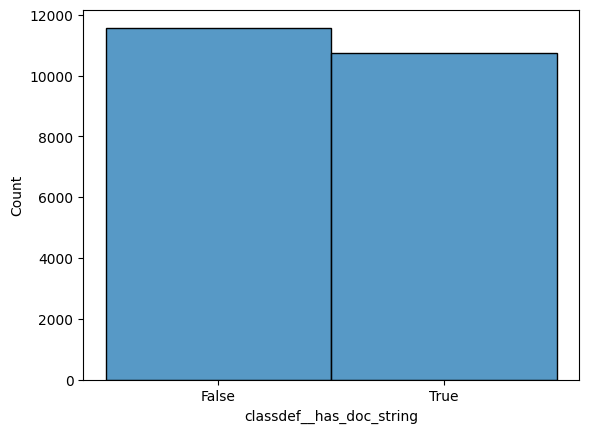

In [18]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_doc_string'], discrete=True)

In [19]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_doc_string'] == True])
num_false_values = len(X[X['classdef__has_doc_string'] == False])
std = X['classdef__has_doc_string'].std()
freq_true = len(X[X['classdef__has_doc_string'] == True]) / len(X['classdef__has_doc_string'])
freq_false = len(X[X['classdef__has_doc_string'] == False]) / len(X['classdef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 10741 valores verdaderos y 11583 valores falsos. Y, la desviación típica es de 0.49965545535087585
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.4811413725138864.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.5188586274861136.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_doc_string', possible_values)

La variable classdef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_doc_string toma el valor de 0.0 en un 51.89% de los items.
La variable classdef__has_doc_string toma el valor de 1.0 en un 48.11% de los items.


In [21]:
X[X['classdef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000,10741.0,10741.0,10741.000000,10741.000000,10741.000000,...,10741.000000,10741.000000,10741.000000,10741.0,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000
mean,0.011079,14.744531,0.088074,5.041151,0.933526,0.0,1.0,7.308072,0.108976,0.294138,...,0.038252,0.001117,0.906247,0.0,0.009589,0.045154,0.030351,0.007541,0.442510,0.557490
std,0.104677,6.353748,0.298145,7.765246,0.666332,0.0,0.0,10.742437,0.209694,0.243793,...,0.133932,0.033408,0.291498,0.0,0.097459,0.207652,0.171559,0.086516,0.496707,0.496707
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,0.004310,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,1.000000,1.000000,0.0,1.0,3.000000,0.000000,0.125000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,3.000000,1.000000,0.0,1.0,4.000000,0.000000,0.250000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,6.000000,1.000000,0.0,1.0,8.000000,0.125000,0.333333,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,50.000000,2.000000,231.000000,45.000000,0.0,1.0,618.000000,0.985915,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable uses_meta_class (4/23)
Esta variable es booleana y representa si la clase usa una metaclass.

<Axes: xlabel='classdef__uses_meta_class', ylabel='Count'>

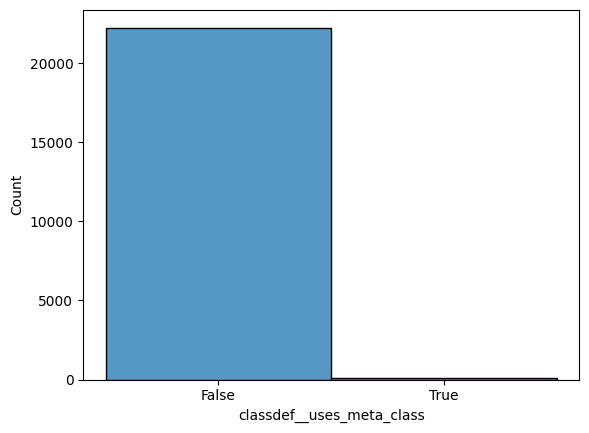

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__uses_meta_class'], discrete=True)

In [23]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__uses_meta_class'] == True])
num_false_values = len(X[X['classdef__uses_meta_class'] == False])
std = X['classdef__uses_meta_class'].std()
freq_true = len(X[X['classdef__uses_meta_class'] == True]) / len(X['classdef__uses_meta_class'])
freq_false = len(X[X['classdef__uses_meta_class'] == False]) / len(X['classdef__uses_meta_class'])
print(f'La variable uses_meta_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a False es {freq_false}.')

La variable uses_meta_class contiene 73 valores verdaderos y 22251 valores falsos. Y, la desviación típica es de 0.05709182098507881
La frecuencia con la que programa puede tener la variable uses_meta_class a True es 0.00327002329331661.
La frecuencia con la que programa puede tener la variable uses_meta_class a False es 0.9967299767066834.


In [24]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__uses_meta_class', possible_values)

La variable classdef__uses_meta_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__uses_meta_class toma el valor de 0.0 en un 99.67% de los items.
La variable classdef__uses_meta_class toma el valor de 1.0 en un 0.327% de los items.


In [25]:
X[X['classdef__uses_meta_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,73.0,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.000000,73.000000
mean,0.0,13.109589,0.178082,6.164383,0.369863,0.0,0.684932,7.383562,0.061406,0.175273,...,0.037465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.287671,0.712329
std,0.0,4.057098,0.385230,5.920805,0.634798,0.0,0.467758,5.891685,0.131925,0.223567,...,0.137794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.455810,0.455810
min,0.0,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,11.000000,0.000000,3.000000,0.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,13.000000,0.000000,5.000000,0.000000,0.0,1.000000,7.000000,0.000000,0.100000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,14.000000,0.000000,8.000000,1.000000,0.0,1.000000,8.000000,0.000000,0.250000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
max,0.0,25.000000,1.000000,45.000000,2.000000,0.0,1.000000,46.000000,0.500000,1.000000,...,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### Variable number_of_characters (5/23)
Esta variable representa el número de caracteres que tiene el nombre de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 52. Con una media de 13.96.

<Axes: ylabel='classdef__number_of_characters'>

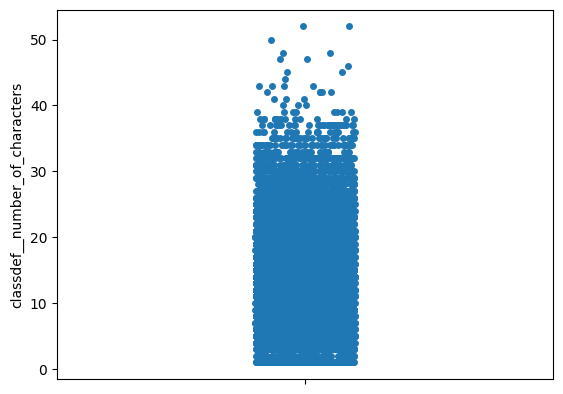

In [26]:
sns.stripplot(X['classdef__number_of_characters'])

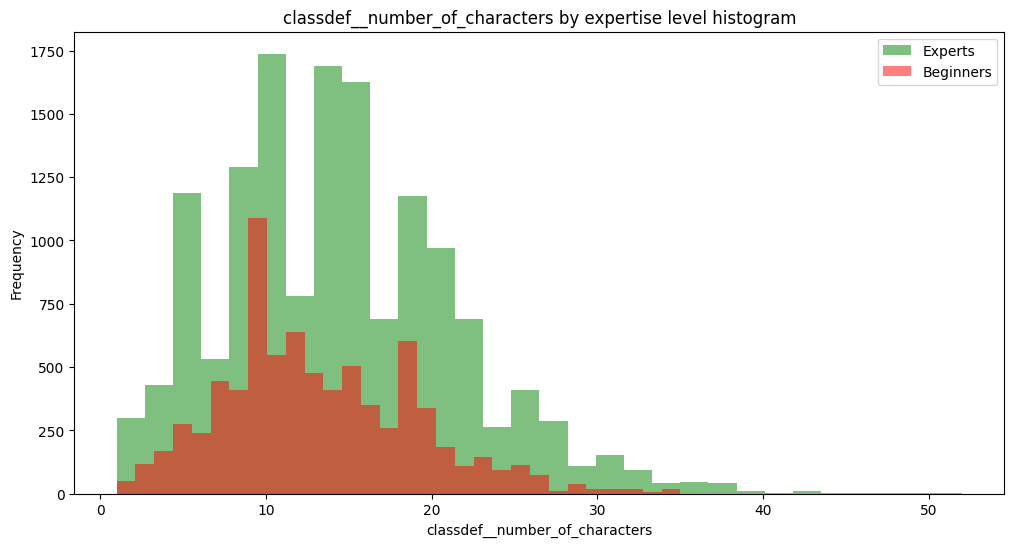

In [27]:
print_histogram(X, 'classdef__number_of_characters', 'classdef__expertise_level', bins=30, include_all=False)

In [28]:
print_outliers_for_df_column(X, 'classdef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6049319686374781
Rango valores atípicos extremos (Tukey): [-18.0,45.0]
Rango valores atípicos leves (Tukey): [-4.5,31.5]
Rango valores atípicos extremos (Fixed BoxPlot): [7.375130028221261,169.77779253054516]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -18.0 (Q1-3*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -4.5 (Q1-1.5*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 297 instancias tienen un valor para classdef__number_of_characters superior a 31.5 (Q3+1.5*IQR) para classdef__number_of_characters. Representando un 1.33% del total de instancias.
+3.0IQR: 8 instancias tienen un valor para classdef__number_of_characters superior a 45.0 (Q3-3*IQR) para classdef__number_of_characters. Representando un 0.03584% del 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 45.0 (Con un MC de 60 usamos Tuckey Extremo)

In [29]:
X[X['classdef__number_of_characters'] > 45.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,8.0,8.00000,8.00000,8.000000,8.0,8.0,8.000000,8.00000,8.000000,8.000000,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
mean,0.0,48.75000,0.75000,1.875000,1.0,0.0,0.500000,2.62500,0.104167,0.191667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,2.31455,0.46291,1.125992,0.0,0.0,0.534522,1.06066,0.197956,0.225902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,46.00000,0.00000,1.000000,1.0,0.0,0.000000,2.00000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,47.00000,0.75000,1.000000,1.0,0.0,0.000000,2.00000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,48.00000,1.00000,1.500000,1.0,0.0,0.500000,2.00000,0.000000,0.100000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,50.50000,1.00000,2.250000,1.0,0.0,1.000000,3.00000,0.083333,0.375000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,52.00000,1.00000,4.000000,1.0,0.0,1.000000,5.00000,0.500000,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Todo clases de expertos con nombres muy largos y concretos.

### Variable number_of_decorators (6/23)
Esta variable representa el número de decoradores que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 5. Con una media de 0.14.

<Axes: ylabel='classdef__number_of_decorators'>

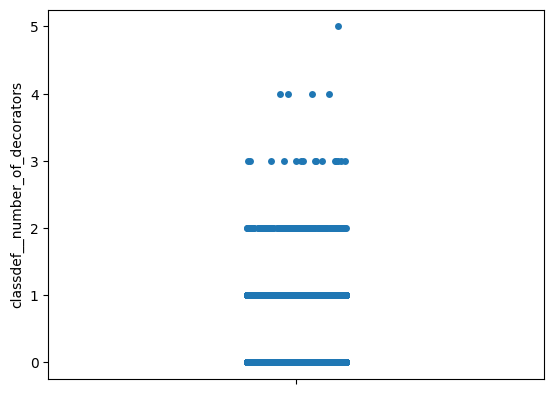

In [30]:
sns.stripplot(X['classdef__number_of_decorators'])

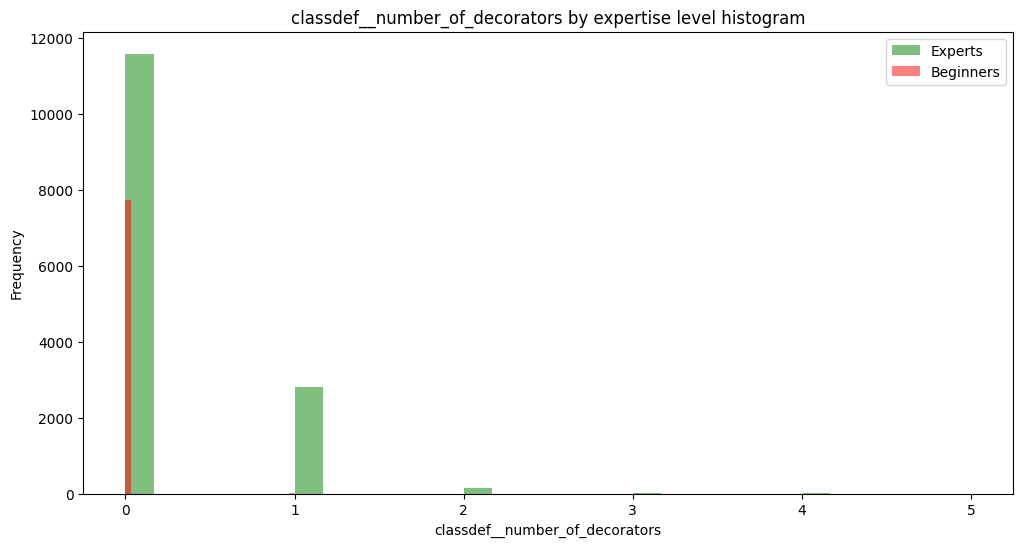

In [31]:
print_histogram(X, 'classdef__number_of_decorators', 'classdef__expertise_level', bins=30, include_all=False)

In [32]:
print_outliers_for_df_column(X, 'classdef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7972229779427177
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 2983 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_decorators. Representando un 13.36% del total de instancias.
+3.0IQR: 2983 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3-3*IQR) para classdef__number_of_decorators. Representando un 13.36% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [33]:
X[X['classdef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.0,2983.000000,2983.000000,2983.000000,2983.000000,...,2983.000000,2983.000000,2983.000000,2983.0,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000
mean,0.006705,11.357694,1.065370,2.993295,0.339256,0.0,0.301710,4.340261,0.153767,0.067675,...,0.024068,0.001341,0.900771,0.0,0.002011,0.012068,0.003017,0.080791,0.003017,0.996983
std,0.081621,7.235739,0.288532,5.195116,0.509031,0.0,0.459077,6.093604,0.302930,0.134976,...,0.110922,0.036600,0.299019,0.0,0.044811,0.109210,0.054854,0.272560,0.054854,0.054854
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,10.000000,1.000000,2.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,16.000000,1.000000,3.000000,1.000000,0.0,1.000000,5.000000,0.058824,0.083333,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,52.000000,5.000000,98.000000,3.000000,0.0,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 86% de las clases no tienen decoradores.

De las clases con decoradores, el 99,7% son de expertos.

### Variable number_of_methods (7/23)
Esta variable representa el número de métodos en la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 231. Con una media de 4.154.

<Axes: ylabel='classdef__number_of_methods'>

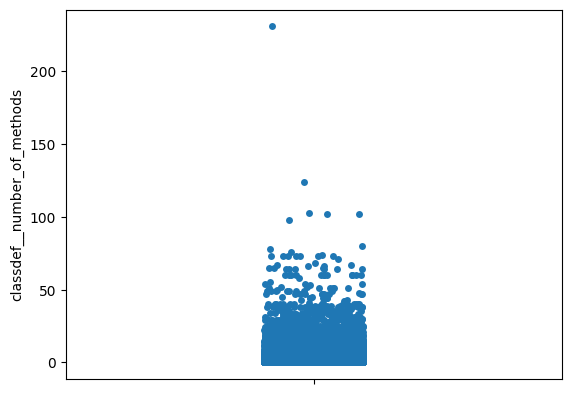

In [34]:
sns.stripplot(X['classdef__number_of_methods'])

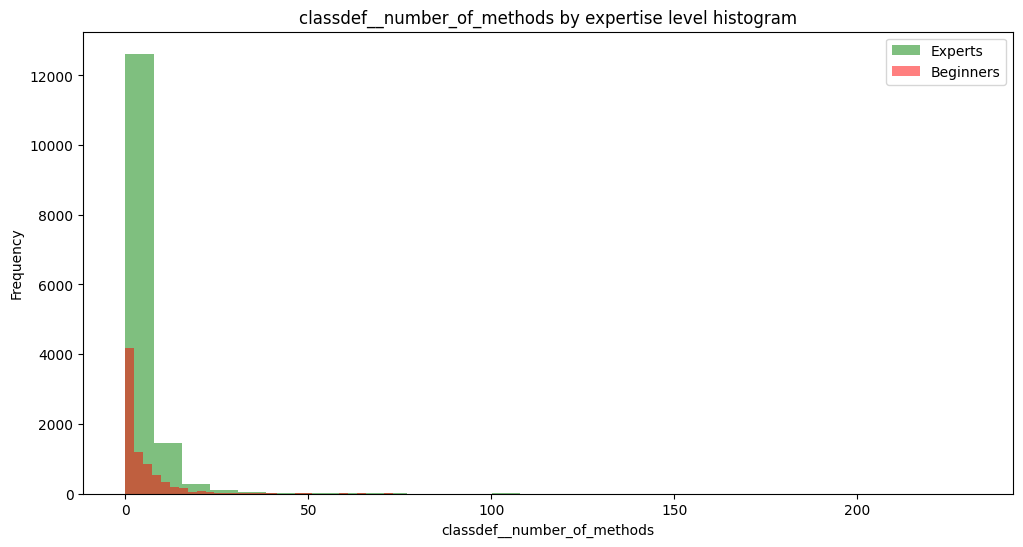

In [35]:
print_histogram(X, 'classdef__number_of_methods', 'classdef__expertise_level', bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [36]:
print_outliers_for_df_column(X, 'classdef__number_of_methods')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7945827966258755
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.6281557960290002,149.0399448256157]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -11.0 (Q1-3*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -5.0 (Q1-1.5*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
+1.5IQR: 1682 instancias tienen un valor para classdef__number_of_methods superior a 11.0 (Q3+1.5*IQR) para classdef__number_of_methods. Representando un 7.534% del total de instancias.
+3.0IQR: 710 instancias tienen un valor para classdef__number_of_methods superior a 17.0 (Q3-3*IQR) para classdef__number_of_methods. Representando un 3.18% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17 (Con un MC de 79 usamos Tuckey)

In [37]:
X[X['classdef__number_of_methods'] > 17].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,710.0,710.000000,710.000000,710.000000,710.000000,710.0,710.000000,710.000000,710.000000,710.000000,...,710.000000,710.0,710.000000,710.0,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,0.0,12.740845,0.070423,29.832394,0.840845,0.0,0.708451,33.290142,0.067749,0.025356,...,0.085951,0.0,0.926761,0.0,0.018310,0.025352,0.028169,0.001408,0.459155,0.540845
std,0.0,5.105145,0.272063,15.763907,1.744229,0.0,0.454796,16.815611,0.100825,0.024043,...,0.187077,0.0,0.260713,0.0,0.134164,0.157303,0.165572,0.037529,0.498680,0.498680
min,0.0,3.000000,0.000000,18.000000,0.000000,0.0,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,9.000000,0.000000,20.000000,0.000000,0.0,0.000000,23.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,12.000000,0.000000,25.000000,1.000000,0.0,1.000000,28.000000,0.023810,0.027027,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,15.000000,0.000000,34.000000,1.000000,0.0,1.000000,37.000000,0.100000,0.040000,...,0.074769,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.0,33.000000,3.000000,231.000000,45.000000,0.0,1.000000,232.000000,0.551020,0.233333,...,0.903846,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar ese con el máximo de 231

In [38]:
X[X['classdef__number_of_methods'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,4290.000000,4290.000000,4290.000000,4290.0,4290.000000,4290.0,4290.000000,4290.000000,4290.000000,4290.000000,...,4290.0,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000
mean,0.062471,14.837996,0.108159,0.0,0.944522,0.0,0.465967,2.532634,0.471321,0.297611,...,0.0,0.001632,0.879254,0.001399,0.010023,0.070163,0.007692,0.029837,0.427506,0.572494
std,0.242037,6.830124,0.323846,0.0,0.488334,0.0,0.498899,4.085526,0.465921,0.383606,...,0.0,0.040366,0.325870,0.037376,0.099625,0.255452,0.087378,0.170157,0.494774,0.494774
min,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000,0.500000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,0.0,1.000000,0.0,1.000000,2.000000,1.000000,0.500000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,45.000000,2.000000,0.0,3.000000,0.0,1.000000,71.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Más de 4000 clases sin métodos? 
* La mayoría usan al menos una base_class. Será herencia mal utilizada? 
* Un alto porcentaje tiene simplemente un comentario y una sentencia Pass. Todo apunta a herencia mal usada.

### Variable number_of_base_classes (8/23)
Esta variable representa el número de base_classes que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 45. Con una media de 0.83.

<Axes: ylabel='classdef__number_of_base_classes'>

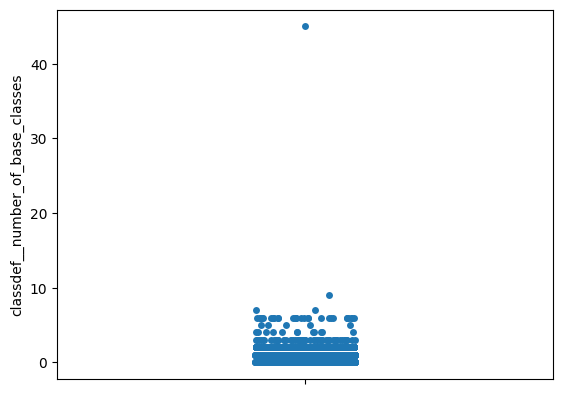

In [39]:
sns.stripplot(X['classdef__number_of_base_classes'])

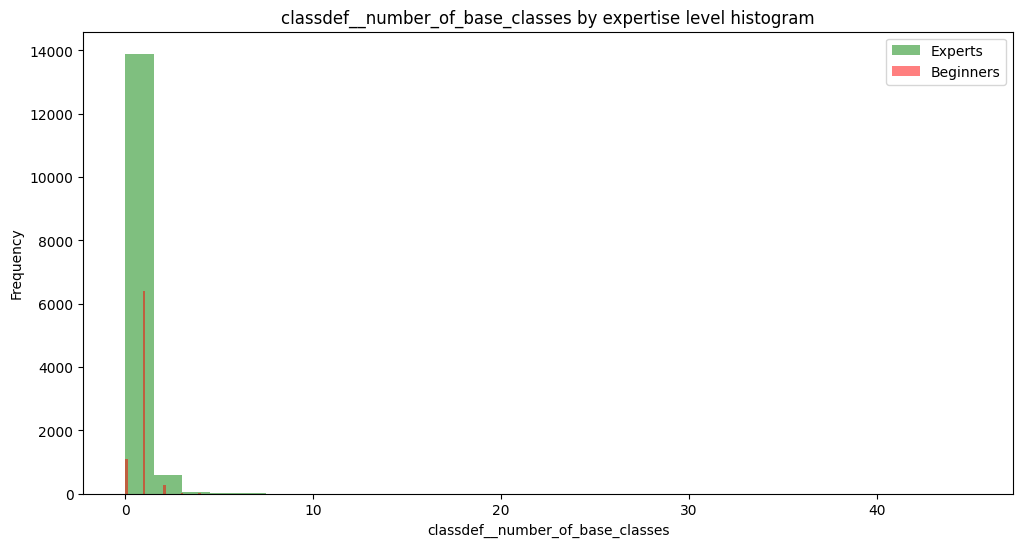

In [40]:
print_histogram(X, 'classdef__number_of_base_classes', 'classdef__expertise_level', bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejado del siguiente.
* Hay que comprobar la clase con 45 base classes. 
* Es una clase de experto de algún tipo de interfaz gráfica.

In [41]:
print_outliers_for_df_column(X, 'classdef__number_of_base_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4777777777777778
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 5003 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-3*IQR) para classdef__number_of_base_classes. Representando un 22.41% del total de instancias.
-1.5IQR: 5003 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-1.5*IQR) para classdef__number_of_base_classes. Representando un 22.41% del total de instancias.
+1.5IQR: 954 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3+1.5*IQR) para classdef__number_of_base_classes. Representando un 4.273% del total de instancias.
+3.0IQR: 954 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3-3*IQR) para classdef__number_of_base_classes. Representando un 4.273% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [42]:
X[X['classdef__number_of_base_classes'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.0,954.000000,954.000000,954.000000,954.000000,...,954.000000,954.0,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,0.164570,15.658281,0.051363,3.917191,2.280922,0.0,0.567086,6.194969,0.226556,0.185035,...,0.026462,0.0,0.908805,0.001048,0.015723,0.034591,0.025157,0.014675,0.296646,0.703354
std,0.370987,6.054717,0.225553,5.996542,1.610144,0.0,0.495739,6.812104,0.343373,0.277435,...,0.099513,0.0,0.288037,0.032376,0.124468,0.182838,0.156685,0.120312,0.457019,0.457019
min,0.000000,1.000000,0.000000,0.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,2.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.000000,0.000000,1.000000,2.000000,0.0,1.000000,4.000000,0.000000,0.062500,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,6.000000,2.000000,0.0,1.000000,8.000000,0.333333,0.250000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,43.000000,2.000000,53.000000,45.000000,0.0,1.000000,59.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (9/23)
Esta variable representa el número medio de sentencias en los métodos de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 2.9.

<Axes: ylabel='classdef__average_stmts_method_body'>

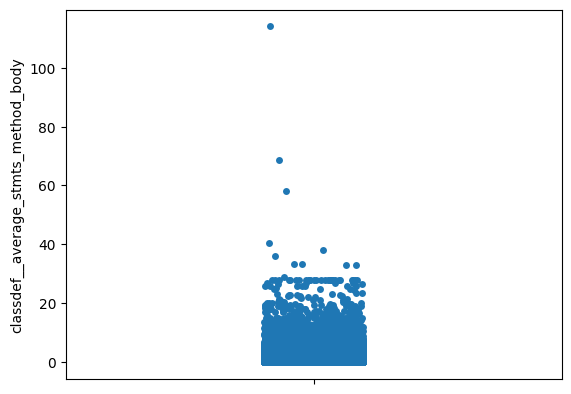

In [43]:
sns.stripplot(X['classdef__average_stmts_method_body'])

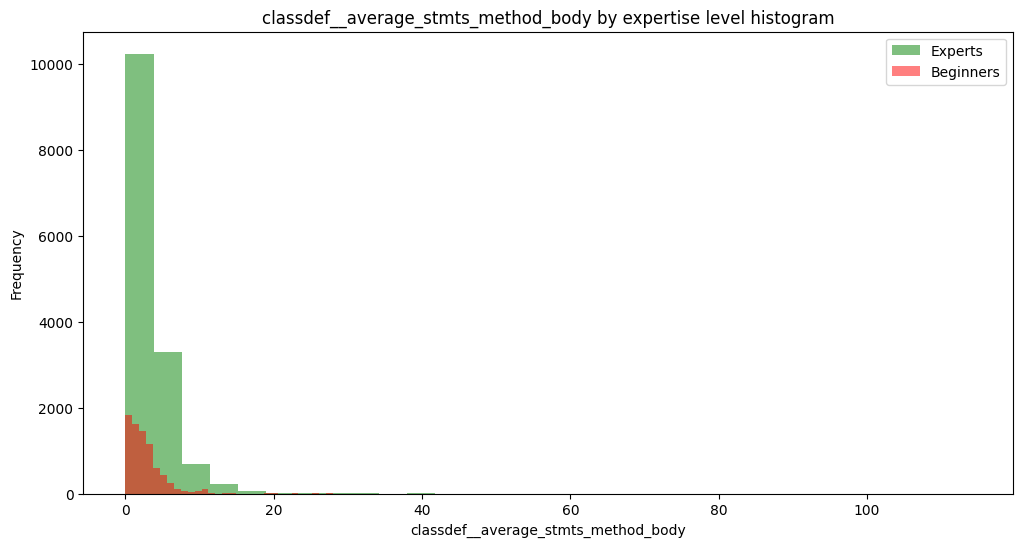

In [44]:
print_histogram(X, 'classdef__average_stmts_method_body', 'classdef__expertise_level', bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [45]:
print_outliers_for_df_column(X, 'classdef__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8334751948857254
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7566089294264589,130.21391131464404]
-3.0IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -8.0 (Q1-3*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -3.5 (Q1-1.5*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 1007 instancias tienen un valor para classdef__average_stmts_method_body superior a 8.5 (Q3+1.5*IQR) para classdef__average_stmts_method_body. Representando un 4.511% del total de instancias.
+3.0IQR: 271 instancias tienen un valor para classdef__average_stmts_method_body superior a 13.0 (Q3-3*IQR) para classdef__average_stmts_me

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13 (Con un MC de 83 usamos Tuckey)

In [46]:
X[X['classdef__average_stmts_method_body'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,271.0,271.000000,271.000000,271.000000,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.0,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.0,15.243543,0.169742,3.564576,0.811808,0.0,0.354244,6.025830,0.187056,0.093228,...,0.003075,0.0,0.815498,0.0,0.011070,0.103321,0.051661,0.018450,0.239852,0.760148
std,0.0,6.976130,0.524199,5.893065,0.419003,0.0,0.479168,7.486486,0.280931,0.139819,...,0.036441,0.0,0.388611,0.0,0.104824,0.304941,0.221750,0.134822,0.427783,0.427783
min,0.0,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.0,14.000000,0.000000,2.000000,1.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,19.000000,0.000000,4.000000,1.000000,0.0,1.000000,7.000000,0.333333,0.200000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,38.000000,3.000000,78.000000,2.000000,0.0,1.000000,78.000000,0.933333,0.500000,...,0.500000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay una clase con una media de 114 sentencias en el cuerpo de los métodos.

### Variable body_count (10/23)
Esta variable representa el número de sentencias que tiene la clase en el root. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 618. Con una media de 5.76.

<Axes: ylabel='classdef__body_count'>

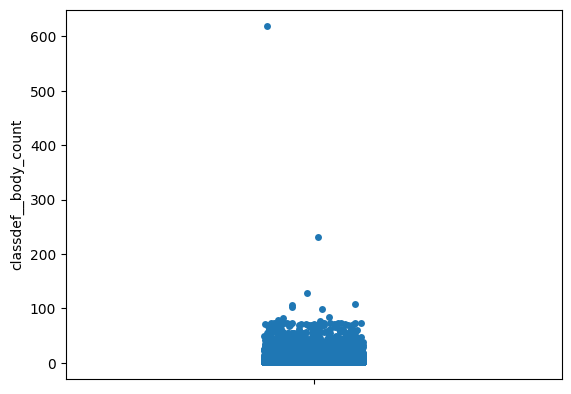

In [47]:
sns.stripplot(X['classdef__body_count'])

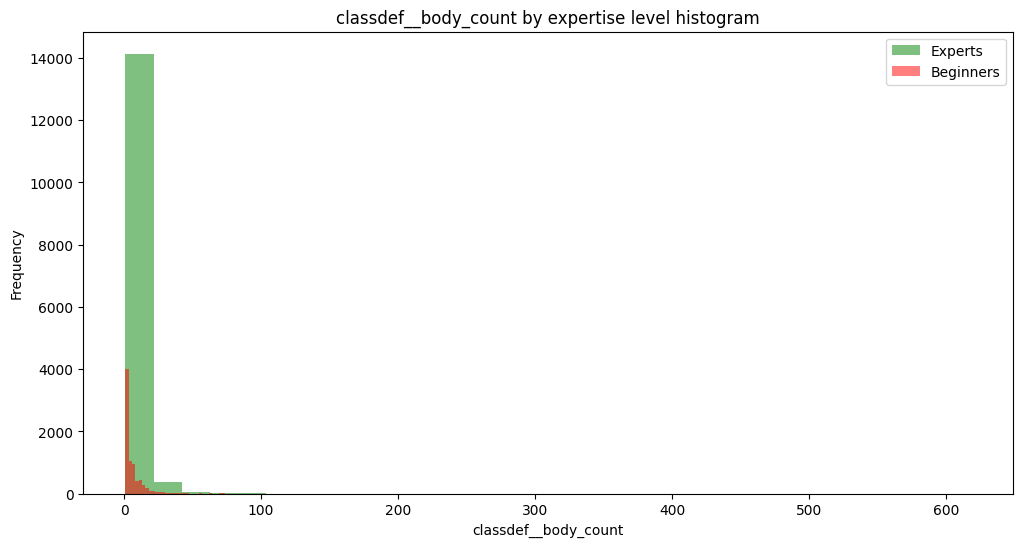

In [48]:
print_histogram(X, 'classdef__body_count', 'classdef__expertise_level', bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [49]:
print_outliers_for_df_column(X, 'classdef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7686854434252883
Rango valores atípicos extremos (Tukey): [-13.0,22.0]
Rango valores atípicos leves (Tukey): [-5.5,14.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.4910960743602302,169.33219048292054]
-3.0IQR: 0 instancias tienen un valor para classdef__body_count inferior a -13.0 (Q1-3*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__body_count inferior a -5.5 (Q1-1.5*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 1664 instancias tienen un valor para classdef__body_count superior a 14.5 (Q3+1.5*IQR) para classdef__body_count. Representando un 7.454% del total de instancias.
+3.0IQR: 725 instancias tienen un valor para classdef__body_count superior a 22.0 (Q3-3*IQR) para classdef__body_count. Representando un 3.248% del total de instancias.
L: 4298 instancias tienen un valor para classdef__body_c

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 171.3 (Con un MC de 77 usamos U)

In [50]:
X[X['classdef__body_count'] > 171].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2.0,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000,...,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,0.0,13.000000,0.0,124.000000,0.500000,0.0,1.0,425.000000,0.237055,0.251346,...,0.002165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,2.828427,0.0,151.320847,0.707107,0.0,0.0,272.943207,0.335246,0.349361,...,0.003061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,11.000000,0.0,17.000000,0.000000,0.0,1.0,232.000000,0.000000,0.004310,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,12.000000,0.0,70.500000,0.250000,0.0,1.0,328.500000,0.118528,0.127828,...,0.001082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,13.000000,0.0,124.000000,0.500000,0.0,1.0,425.000000,0.237055,0.251346,...,0.002165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,14.000000,0.0,177.500000,0.750000,0.0,1.0,521.500000,0.355583,0.374864,...,0.003247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,15.000000,0.0,231.000000,1.000000,0.0,1.0,618.000000,0.474110,0.498382,...,0.004329,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Hay una clase con 618 sentencias en el root.  

### Variable number_of_keywords (11/23)
Esta variable representa el número de keywords diferentes de metaclass que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. Con una media de 0.00054.

<Axes: ylabel='classdef__number_of_keywords'>

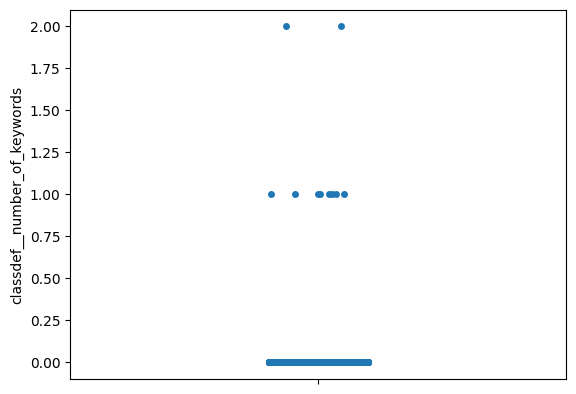

In [51]:
sns.stripplot(X['classdef__number_of_keywords'])

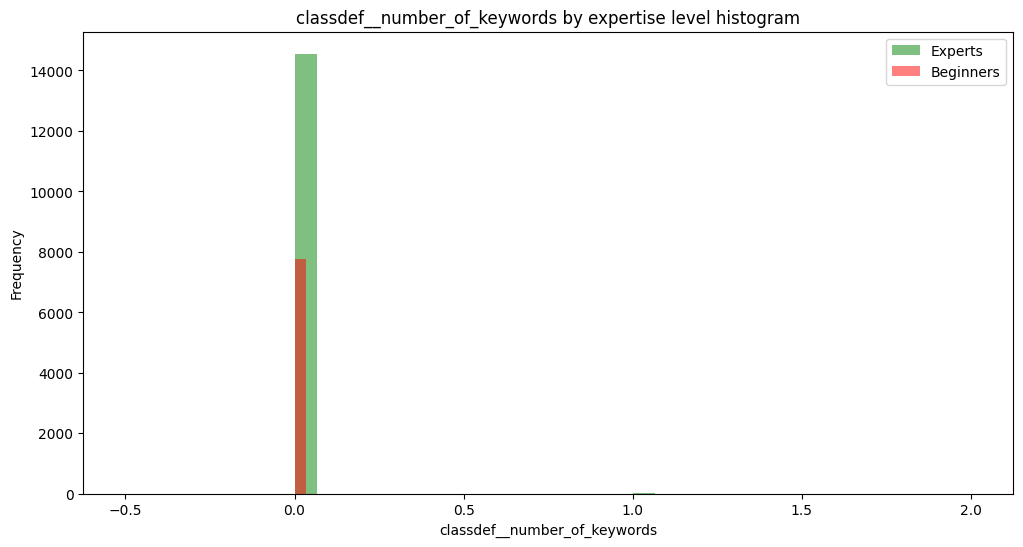

In [52]:
print_histogram(X, 'classdef__number_of_keywords', 'classdef__expertise_level', bins=30, include_all=False)

In [53]:
print_outliers_for_df_column(X, 'classdef__number_of_keywords')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9898244736092712
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+1.5IQR: 10 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_keywords. Representando un 0.04479% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3-3*IQR) para classdef__number_of_keywords. Representando un 0.04479% del total de instancias.
L: 0 instancias tienen un valor

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [54]:
X[X['classdef__number_of_keywords'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,10.0,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,0.0,16.799999,0.700000,0.900000,1.0,0.0,0.800000,8.000000,0.809372,0.120459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,3.489667,0.483046,1.449138,0.0,0.0,0.421637,6.182412,0.120404,0.093604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,12.000000,0.000000,0.000000,1.0,0.0,0.000000,1.000000,0.666667,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,14.500000,0.250000,0.000000,1.0,0.0,1.000000,4.250000,0.750000,0.053442,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,17.000000,1.000000,0.000000,1.0,0.0,1.000000,6.000000,0.780193,0.105556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,18.750000,1.000000,1.000000,1.0,0.0,1.000000,9.750000,0.875000,0.191667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,23.000000,1.000000,4.000000,1.0,0.0,1.000000,23.000000,1.000000,0.250000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Todas las clases que tienen keywords son de expertos

### Variable height (12/23)
Esta variable representa la distancia a la raiz del modulo en la que se encuentra la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 8. Con una media de 1.17.

<Axes: ylabel='classdef__height'>

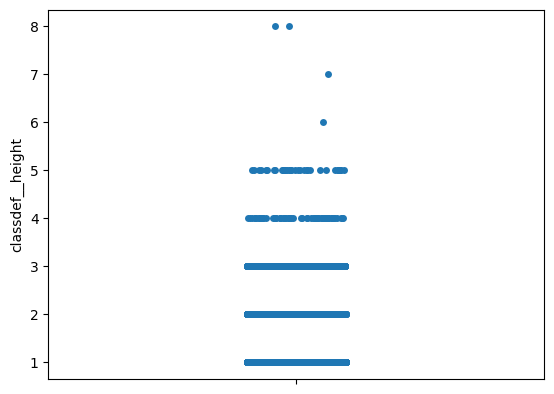

In [55]:
sns.stripplot(X['classdef__height'])

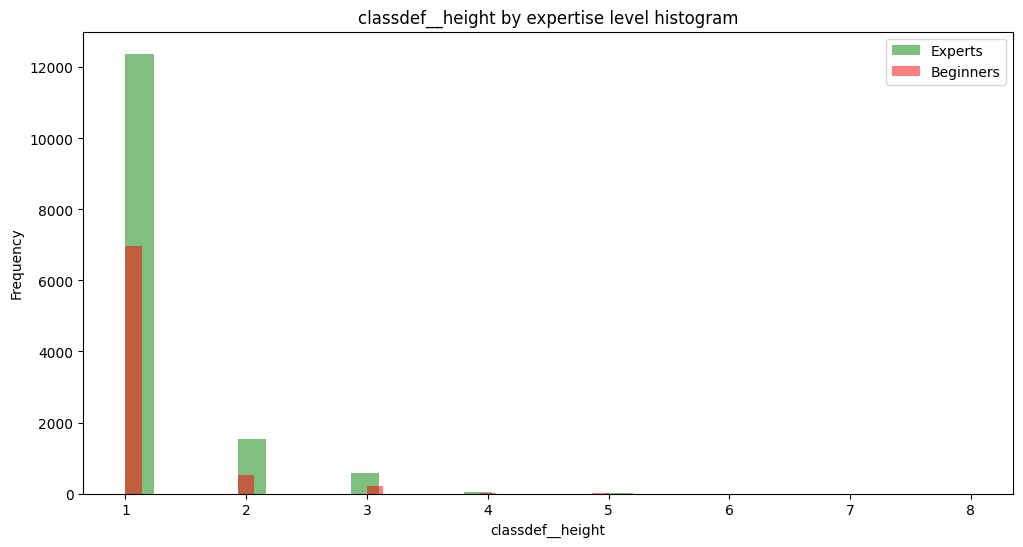

In [56]:
print_histogram(X, 'classdef__height', 'classdef__expertise_level', bins=30, include_all=False)

In [57]:
print_outliers_for_df_column(X, 'classdef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-3*IQR) para classdef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-1.5*IQR) para classdef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 2963 instancias tienen un valor para classdef__height superior a 1.0 (Q3+1.5*IQR) para classdef__height. Representando un 13.27% del total de instancias.
+3.0IQR: 2963 instancias tienen un valor para classdef__height superior a 1.0 (Q3-3*IQR) para classdef__height. Representando un 13.27% del total de instancias.
L: 0 instancias tienen un valor para classdef__height inferior a 1.0 para classdef__height. Representando un 0.0% del total de instancias.
U: 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [58]:
X[X['classdef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.0,2963.000000,2963.000000,2963.000000,2963.000000,...,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,0.012150,9.611205,0.410395,2.095511,0.510294,0.0,0.107324,2.847452,0.161089,0.043307,...,0.003907,0.000337,0.809315,0.003037,0.010800,0.058049,0.012150,0.106311,0.262234,0.737766
std,0.109573,6.068818,0.520660,3.574611,0.601718,0.0,0.309577,4.259122,0.324556,0.148106,...,0.050767,0.018371,0.392908,0.055039,0.103377,0.233876,0.109573,0.308287,0.439924,0.439924
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,13.000000,1.000000,2.000000,1.000000,0.0,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,44.000000,2.000000,51.000000,9.000000,0.0,1.000000,56.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar los que tiene profundidad 8. 
* Ambas son clases vacias con una sentencia Pass en programas de expertos.

### Variable assignments_pct (13/23)
Esta variable representa la proporción de las sentencias en el root de la clase que son asignaciones. Toma los valores de 0.0 - 1.0. La media es 0.157.

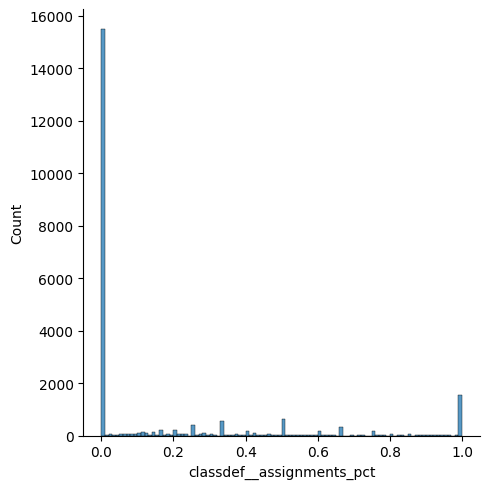

In [59]:
sns.displot(X['classdef__assignments_pct'], bins=[i / 100 for i in range(0, 101)])

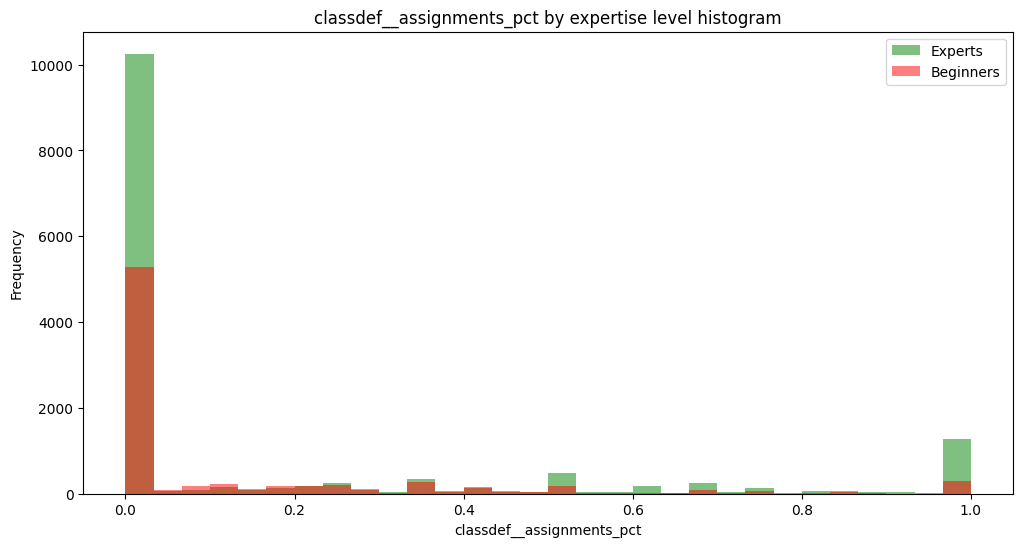

In [60]:
print_histogram(X, 'classdef__assignments_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [61]:
print_outliers_for_df_column(X, 'classdef__assignments_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6604754775762558
Rango valores atípicos extremos (Tukey): [-0.5454545617103577,0.7272727489471436]
Rango valores atípicos leves (Tukey): [-0.27272728085517883,0.4545454680919647]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.027026237492597072,4.010876708136284]
-3.0IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.5454545617103577 (Q1-3*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.27272728085517883 (Q1-1.5*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 3434 instancias tienen un valor para classdef__assignments_pct superior a 0.4545454680919647 (Q3+1.5*IQR) para classdef__assignments_pct. Representando un 15.38% del total de instancias.
+3.0IQR: 2014 instancias tienen un valor para classdef__assignments_pct superior a 0.727272

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.72 (Con un MC de 66 usamos U)

In [62]:
X[X['classdef__assignments_pct'] > 0.72].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.0,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.0,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.112321,13.771895,0.147452,0.121227,0.862444,0.0,0.169223,4.381495,0.957838,0.026931,...,0.004866,0.000495,0.849085,0.0,0.019792,0.090054,0.004453,0.036121,0.202870,0.797130
std,0.315839,6.499499,0.372348,0.467402,0.520738,0.0,0.375042,6.282337,0.083949,0.066768,...,0.066053,0.022244,0.358055,0.0,0.139320,0.286331,0.066600,0.186637,0.402236,0.402236
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.727273,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,13.000000,0.000000,0.000000,1.000000,0.0,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,0.000000,1.000000,0.0,0.000000,5.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,37.000000,2.000000,6.000000,3.000000,0.0,1.000000,71.000000,1.000000,0.250000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 69% de las clases no tienen asignaciones en el root.

### Variable expressions_pct (14/23)
Esta variable representa la proporción de las sentencias en root de la clase que son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.143.

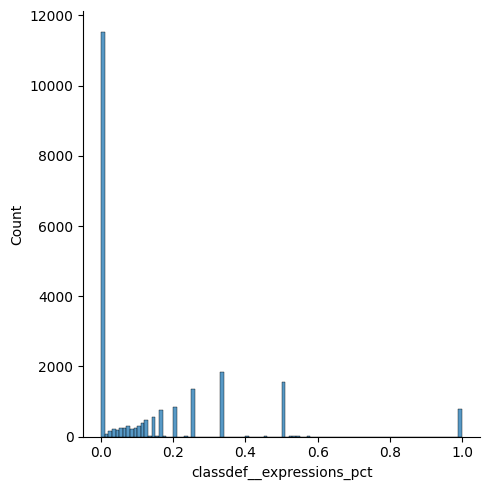

In [63]:
sns.displot(X['classdef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

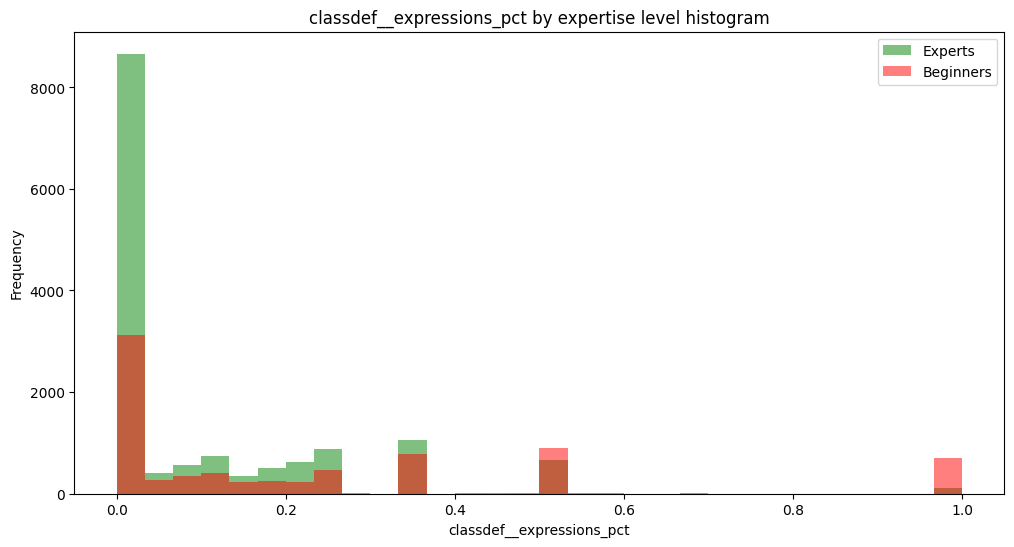

In [64]:
print_histogram(X, 'classdef__expressions_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [65]:
print_outliers_for_df_column(X, 'classdef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.43513240768858896
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08177426612466891,2.387635641319434]
-3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.75 (Q1-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.375 (Q1-1.5*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 796 instancias tienen un valor para classdef__expressions_pct superior a 0.625 (Q3+1.5*IQR) para classdef__expressions_pct. Representando un 3.566% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct superior a 1.0 (Q3-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.625 (Con un MC de 43 usamos Tuckey)

In [66]:
X[X['classdef__expressions_pct'] > 0.625].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,796.0,796.000000,796.000000,796.0,796.000000,796.0,796.000000,796.000000,796.000000,796.000000,...,796.0,796.0,796.000000,796.0,796.000000,796.000000,796.0,796.0,796.000000,796.000000
mean,0.0,17.982412,0.012563,0.0,1.084171,0.0,0.993719,1.005025,0.000838,0.999162,...,0.0,0.0,0.868090,0.0,0.007538,0.124372,0.0,0.0,0.868090,0.131910
std,0.0,6.853889,0.111448,0.0,0.299603,0.0,0.079056,0.100188,0.016698,0.016698,...,0.0,0.0,0.338605,0.0,0.086546,0.330213,0.0,0.0,0.338605,0.338605
min,0.0,3.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.666667,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,13.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
50%,0.0,17.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
75%,0.0,21.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
max,0.0,35.000000,1.000000,0.0,2.000000,0.0,1.000000,3.000000,0.333333,1.000000,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000


### IMPORTANTE
El 51% de las clases no tienen expresiones en el root.

### Variable type_annotations_pct (15/23)
Esta variable representa la proporción de parámetros y returns con anotacion de tipo en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.125. 

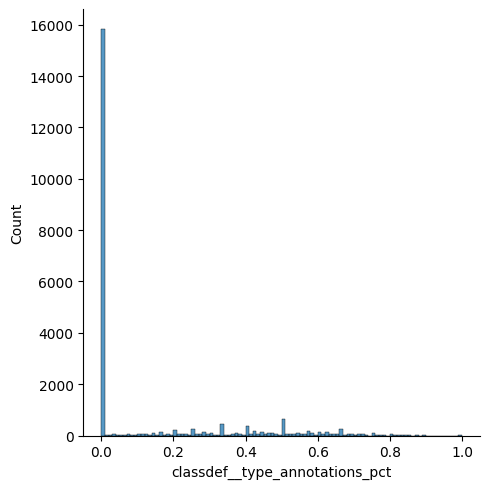

In [67]:
sns.displot(X['classdef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

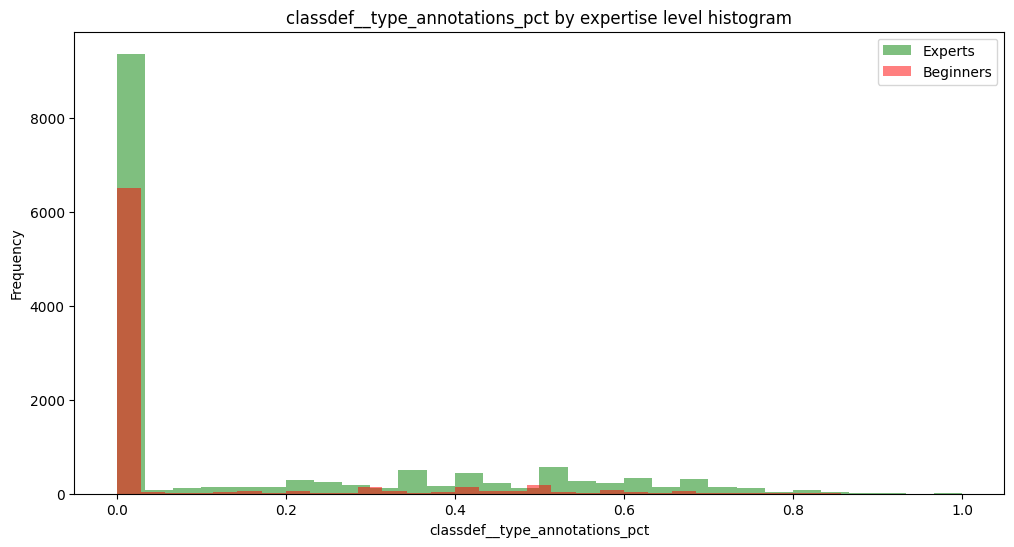

In [68]:
print_histogram(X, 'classdef__type_annotations_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [69]:
print_outliers_for_df_column(X, 'classdef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.45068977705938784
Rango valores atípicos extremos (Tukey): [-0.6000000089406967,0.800000011920929]
Rango valores atípicos leves (Tukey): [-0.30000000447034836,0.5000000074505806]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.06195251904813533,2.019908673529623]
-3.0IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -0.6000000089406967 (Q1-3*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -0.30000000447034836 (Q1-1.5*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2136 instancias tienen un valor para classdef__type_annotations_pct superior a 0.5000000074505806 (Q3+1.5*IQR) para classdef__type_annotations_pct. Representando un 9.568% del total de instancias.
+3.0IQR: 139 instancias tienen un valor para classdef__type_an

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.80 (Con un MC de 45 usamos Tuckey Extremo)

In [70]:
X[X['classdef__type_annotations_pct'] > 0.80].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,139.0,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.0,139.000000,139.0,139.0,139.000000,139.0,139.0,139.000000,139.000000
mean,0.0,15.079137,0.064748,2.208633,0.654676,0.0,0.582734,3.359712,0.104457,0.191152,...,0.024078,0.0,0.992806,0.0,0.0,0.007194,0.0,0.0,0.143885,0.856115
std,0.0,6.078073,0.246971,2.897962,0.586221,0.0,0.494891,3.426257,0.191203,0.184709,...,0.091620,0.0,0.084819,0.0,0.0,0.084819,0.0,0.0,0.352242,0.352242
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,10.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
50%,0.0,15.000000,0.000000,1.000000,1.000000,0.0,1.000000,3.000000,0.000000,0.200000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.0,20.000000,0.000000,2.000000,1.000000,0.0,1.000000,4.000000,0.200000,0.333333,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
max,0.0,34.000000,1.000000,28.000000,2.000000,0.0,1.000000,29.000000,0.846154,0.500000,...,0.500000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000


### IMPORTANTE
El 70% de las clases no tienen anotaciones de tipo.

### Variable private_methods_pct (16/23)
Esta variable representa la proporción de métodos que son privados en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.07

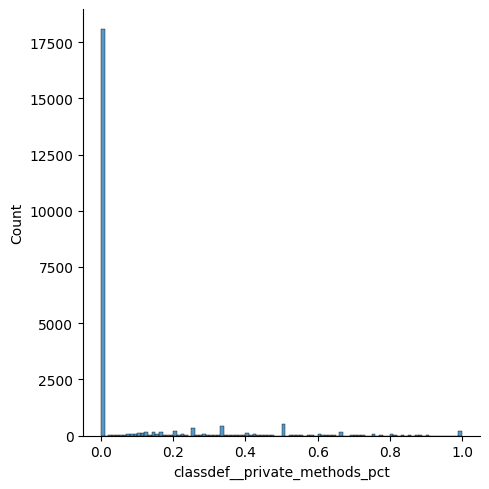

In [71]:
sns.displot(X['classdef__private_methods_pct'], bins=[i / 100 for i in range(0, 101)])

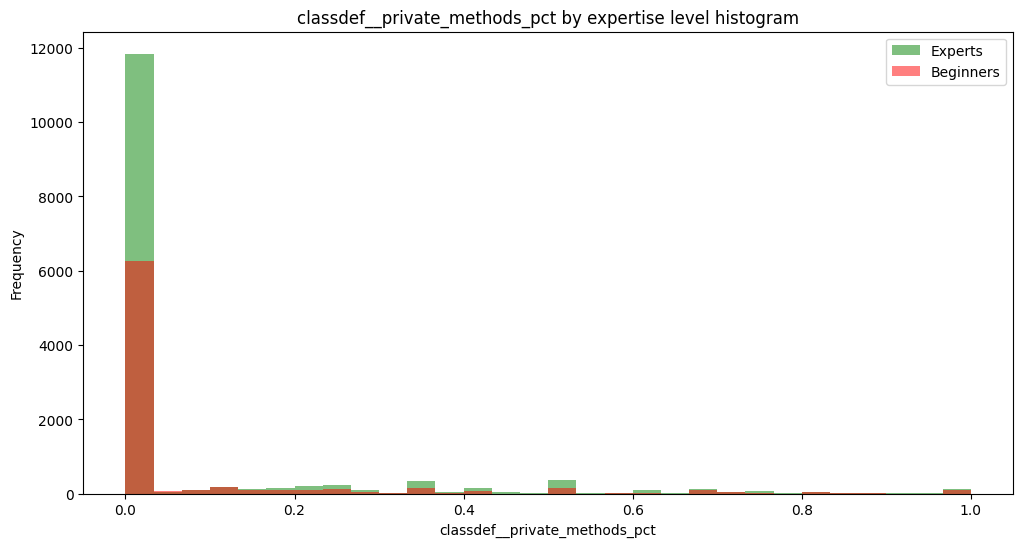

In [72]:
print_histogram(X, 'classdef__private_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [73]:
print_outliers_for_df_column(X, 'classdef__private_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7686961069650354
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 4252 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__private_methods_pct. Representando un 19.05% del total de instancias.
+3.0IQR: 4252 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__private_methods_pct. Representando un 19.05% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [74]:
X[X['classdef__private_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.0,4252.000000,4252.000000,4252.000000,4252.000000,...,4252.000000,4252.0,4252.000000,4252.0,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000
mean,0.000470,15.055268,0.091722,10.058796,0.892051,0.0,0.683443,12.408514,0.093998,0.085025,...,0.049472,0.0,0.914864,0.0,0.016463,0.038335,0.022813,0.007526,0.355597,0.644403
std,0.021685,6.158879,0.323991,10.506009,0.828715,0.0,0.465188,14.950632,0.155660,0.089239,...,0.129230,0.0,0.279117,0.0,0.127262,0.192026,0.149324,0.086435,0.478750,0.478750
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,4.000000,1.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,7.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.066667,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,12.000000,1.000000,0.0,1.000000,15.000000,0.142857,0.142857,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,44.000000,4.000000,231.000000,45.000000,0.0,1.000000,618.000000,0.846154,0.500000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 80% de las clases no tienen métodos privados. Y hay cerca de un 1% de las clases tienen todos los métodos privados. Para que? Mal uso del POO?

### Variable magic_methods_pct (17/23)
Esta variable representa la proporción de métodos que son magic en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.266

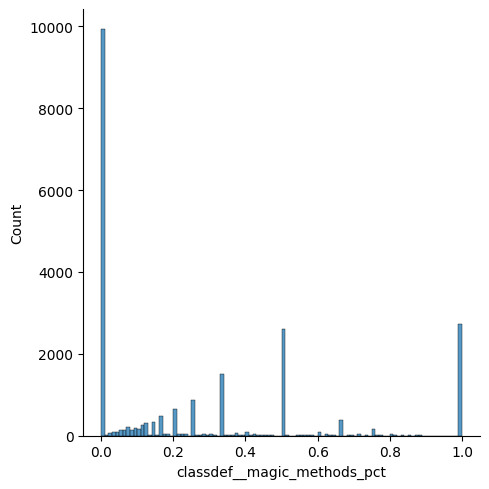

In [75]:
sns.displot(X['classdef__magic_methods_pct'], bins=[i / 100 for i in range(0, 101)])

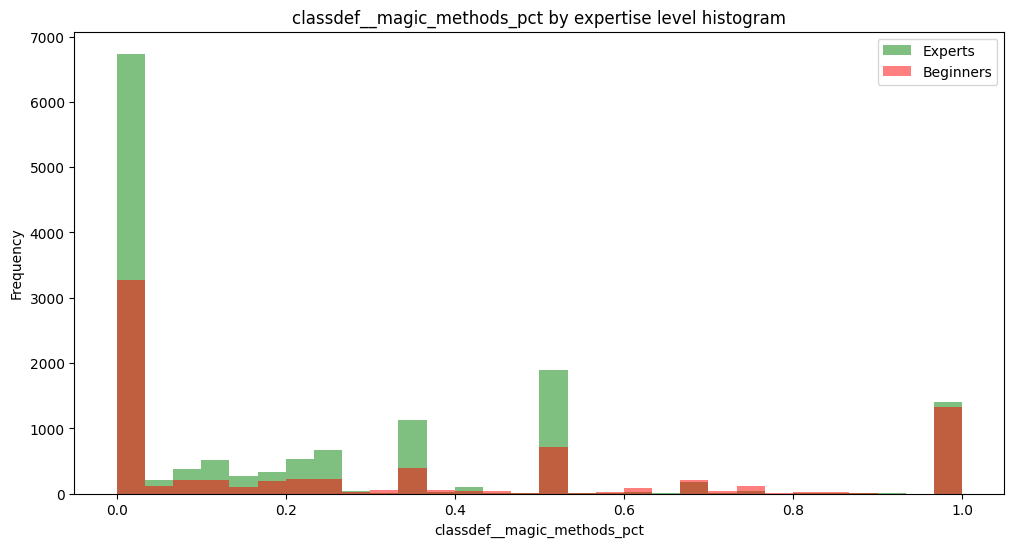

In [76]:
print_histogram(X, 'classdef__magic_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [77]:
print_outliers_for_df_column(X, 'classdef__magic_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3952281177043915
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.18806258278037685,4.144540878857006]
-3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -1.5 (Q1-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -0.75 (Q1-1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 1.25 (Q3+1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 2.0 (Q3-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
L: 0 insta

In [78]:
X[X['classdef__magic_methods_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.0,2732.000000,2732.000000,2732.000000,2732.000000,...,2732.000000,2732.000000,2732.000000,2732.0,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000
mean,0.002562,13.039532,0.170937,1.647877,0.722548,0.0,0.452050,2.522328,0.061138,0.172050,...,0.000366,0.000366,0.746706,0.0,0.009883,0.118960,0.081259,0.042826,0.486091,0.513909
std,0.050563,6.634567,0.381354,1.272654,0.737074,0.0,0.497787,2.171487,0.176966,0.205762,...,0.019132,0.019132,0.434978,0.0,0.098938,0.323801,0.273283,0.202501,0.499898,0.499898
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,2.000000,1.000000,0.0,1.000000,3.000000,0.000000,0.333333,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,52.000000,2.000000,12.000000,6.000000,0.0,1.000000,24.000000,0.958333,0.500000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 44% de las clases no tienen métodos magic. Y un 14% de las clases tienen todos los métodos magic.

### Variable async_methods_pct (18/23)
Esta variable representa la proporción de métodos que son asincronos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.024

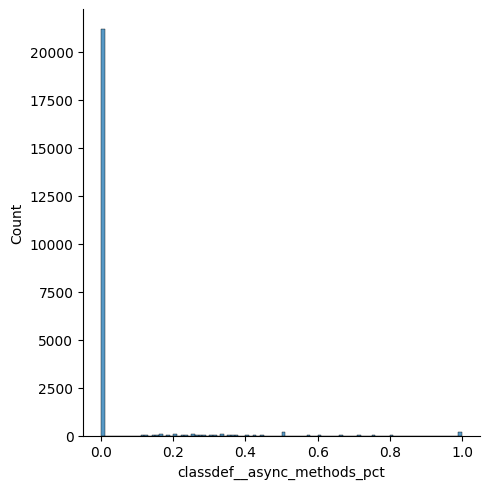

In [79]:
sns.displot(X['classdef__async_methods_pct'], bins=[i / 100 for i in range(0, 101)])

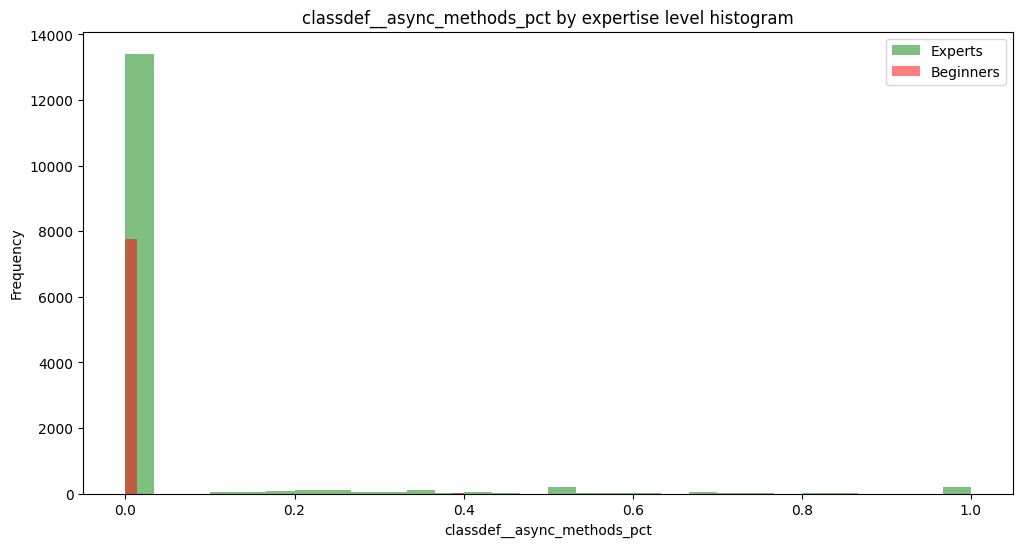

In [80]:
print_histogram(X, 'classdef__async_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [81]:
print_outliers_for_df_column(X, 'classdef__async_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8887587040231129
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1161 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__async_methods_pct. Representando un 5.201% del total de instancias.
+3.0IQR: 1161 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__async_methods_pct. Representando un 5.201% del total de instancias.
L: 0 instancias tienen un valor para cl

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [82]:
X[X['classdef__async_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,1161.0,1161.000000,1161.000000,1161.000000,1161.000000,1161.0,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.0,1161.000000,1161.000000,1161.0,1161.000000,1161.000000,1161.000000
mean,0.0,14.590870,0.354867,6.499569,0.640827,0.0,0.482343,8.389319,0.076587,0.057022,...,0.043806,0.001723,0.939707,0.0,0.000861,0.010336,0.0,0.047373,0.005168,0.994832
std,0.0,6.999055,0.529960,5.772128,0.547112,0.0,0.499903,8.109915,0.149774,0.076835,...,0.099511,0.041487,0.238131,0.0,0.029348,0.101183,0.0,0.212527,0.071733,0.071733
min,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,2.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,0.0,15.000000,0.000000,5.000000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,0.0,19.000000,1.000000,9.000000,1.000000,0.0,1.000000,11.000000,0.090909,0.100000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,0.0,39.000000,4.000000,50.000000,2.000000,0.0,1.000000,51.000000,0.666667,0.500000,...,0.625000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


### IMPORTANTE
Apenas el 5% de las clases tienen algun métodos asincronos.

### Variable class_methods_pct (19/23)
Esta variable representa la proporción de métodos que son de clase en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.028

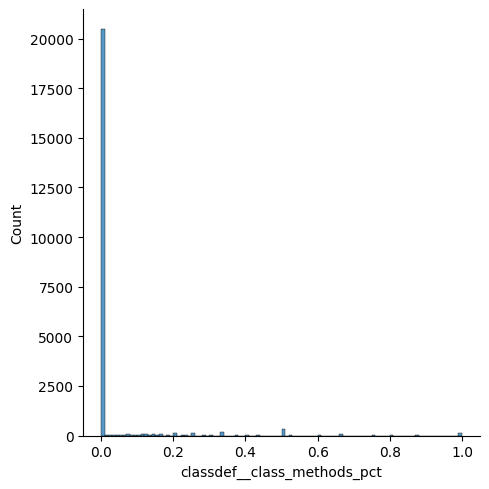

In [83]:
sns.displot(X['classdef__class_methods_pct'], bins=[i / 100 for i in range(0, 101)])

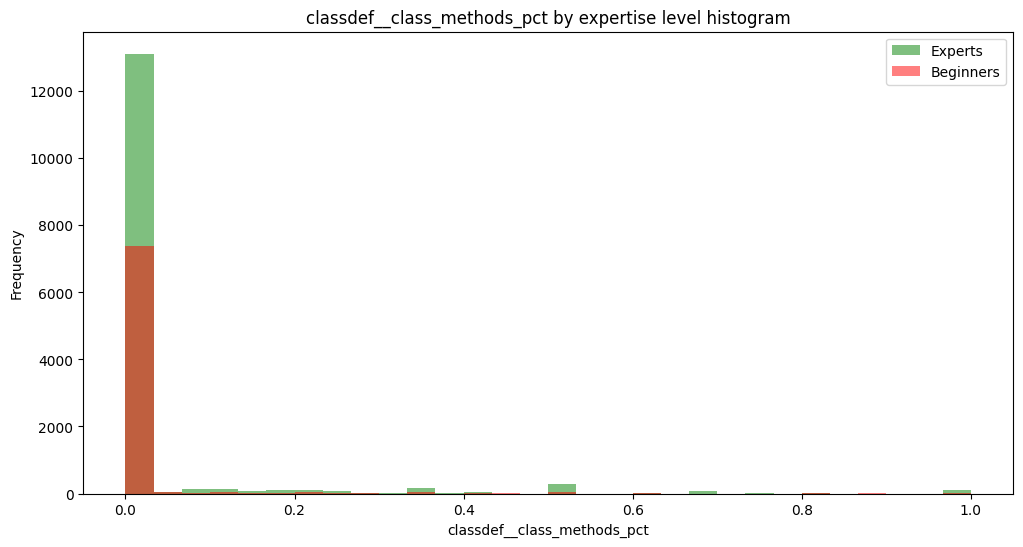

In [84]:
print_histogram(X, 'classdef__class_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [85]:
print_outliers_for_df_column(X, 'classdef__class_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.86823816871719
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1857 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__class_methods_pct. Representando un 8.318% del total de instancias.
+3.0IQR: 1857 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__class_methods_pct. Representando un 8.318% del total de instancias.
L: 0 instancias tienen un valor para clas

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [86]:
X[X['classdef__class_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,1857.000000,1857.00000,1857.000000,1857.000000,1857.000000,1857.0,1857.000000,1857.000000,1857.000000,1857.000000,...,1857.000000,1857.000000,1857.000000,1857.0,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,0.007001,14.84868,0.078083,7.936457,0.797523,0.0,0.595046,11.163705,0.200872,0.076196,...,0.046380,0.001077,0.939149,0.0,0.007539,0.021002,0.008616,0.022617,0.213247,0.786753
std,0.083398,6.18555,0.295146,8.668851,0.467631,0.0,0.491015,17.360004,0.233031,0.093666,...,0.112142,0.032809,0.239121,0.0,0.086523,0.143428,0.092447,0.148720,0.409711,0.409711
min,0.000000,1.00000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.00000,0.000000,3.000000,1.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,14.00000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.090909,0.050000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.00000,0.000000,10.000000,1.000000,0.0,1.000000,13.000000,0.375000,0.125000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,39.00000,2.000000,102.000000,3.000000,0.0,1.000000,618.000000,0.909091,0.500000,...,0.800000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Menos del 9% de las clases tienen algún método de clase.

### Variable static_methods_pct (20/23)
Esta variable representa la proporción de métodos que son estaticos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.015.

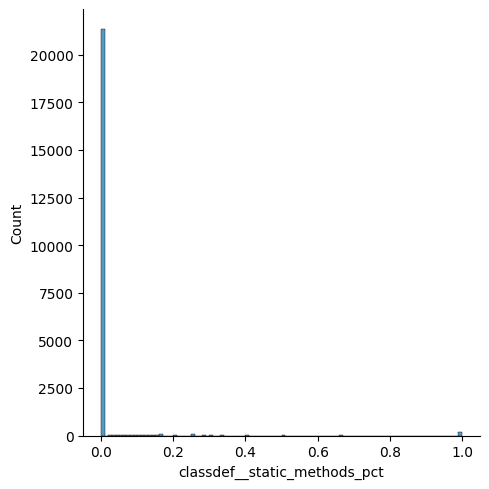

In [87]:
sns.displot(X['classdef__static_methods_pct'], bins=[i / 100 for i in range(0, 101)])

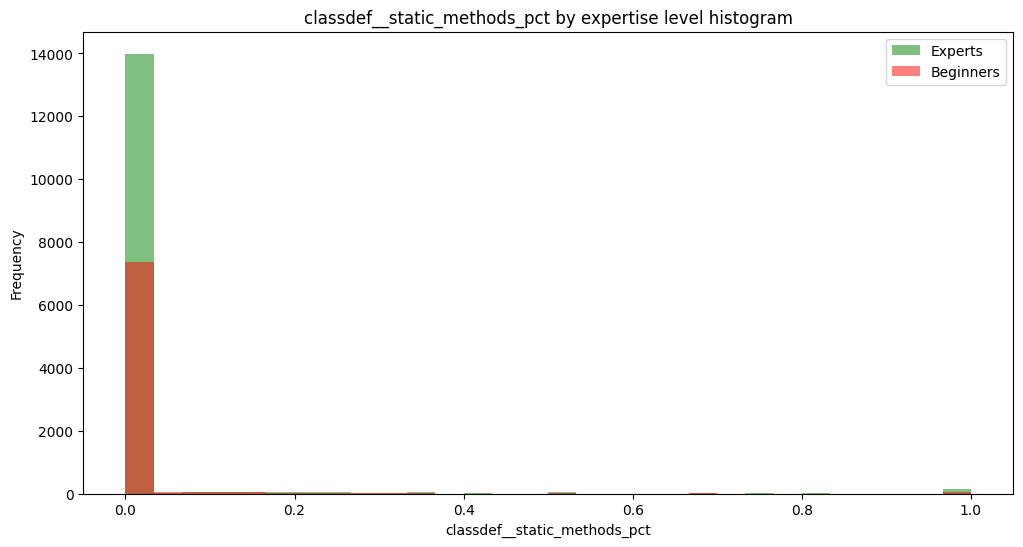

In [88]:
print_histogram(X, 'classdef__static_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [89]:
print_outliers_for_df_column(X, 'classdef__static_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9159799936455768
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 988 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__static_methods_pct. Representando un 4.426% del total de instancias.
+3.0IQR: 988 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__static_methods_pct. Representando un 4.426% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [90]:
X[X['classdef__static_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,0.001012,13.512146,0.104251,11.570850,0.772267,0.0,0.587045,15.118421,0.090047,0.077762,...,0.026547,0.001012,0.853239,0.0,0.033401,0.040486,0.063765,0.008097,0.398785,0.601215
std,0.031814,5.968412,0.315526,15.065814,0.501022,0.0,0.492614,25.817204,0.150112,0.109210,...,0.084219,0.031814,0.354047,0.0,0.179772,0.197196,0.244458,0.089665,0.489896,0.489896
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,4.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,13.000000,0.000000,7.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.035714,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,13.000000,1.000000,0.0,1.000000,17.000000,0.125000,0.125000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,43.000000,2.000000,231.000000,3.000000,0.0,1.000000,618.000000,0.838710,0.500000,...,0.827586,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 98% de las clases no tienen métodos estáticos.

### Variable abstract_methods_pct (21/23)
Esta variable representa la proporción de métodos que son abstractos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.006

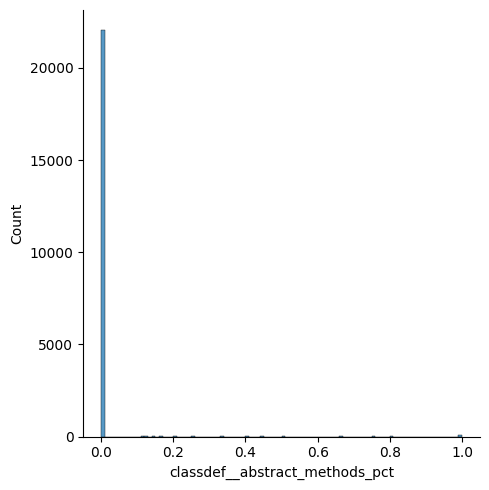

In [91]:
sns.displot(X['classdef__abstract_methods_pct'], bins=[i / 100 for i in range(0, 101)])

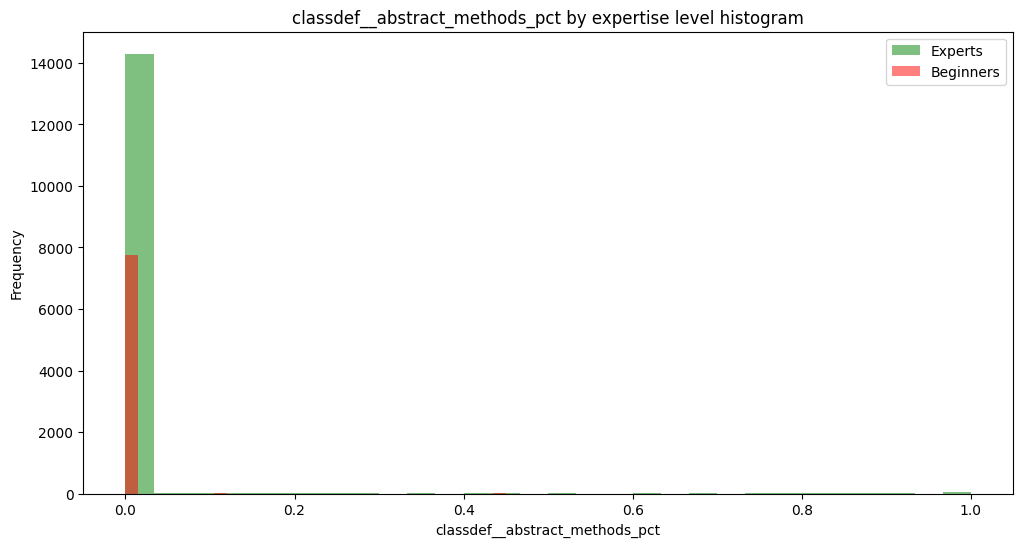

In [92]:
print_histogram(X, 'classdef__abstract_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [93]:
print_outliers_for_df_column(X, 'classdef__abstract_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9486330958393164
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 282 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__abstract_methods_pct. Representando un 1.263% del total de instancias.
+3.0IQR: 282 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__abstract_methods_pct. Representando un 1.263% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [94]:
X[X['classdef__abstract_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,282.0,282.000000,282.000000,282.000000,282.000000,282.0,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.0,282.000000,282.0,282.0,282.000000,282.0,282.0,282.000000,282.000000
mean,0.0,15.687943,0.056738,7.528369,1.156028,0.0,0.730496,9.039007,0.049760,0.139508,...,0.092036,0.0,0.989362,0.0,0.0,0.010638,0.0,0.0,0.039007,0.960993
std,0.0,5.649470,0.231752,6.928273,0.611674,0.0,0.444491,7.434308,0.115694,0.141993,...,0.203865,0.0,0.102774,0.0,0.0,0.102774,0.0,0.0,0.193956,0.193956
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,12.000000,0.000000,3.000000,1.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
50%,0.0,15.000000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.000000,0.100000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.0,19.000000,0.000000,9.750000,1.000000,0.0,1.000000,12.000000,0.000000,0.200000,...,0.103947,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
max,0.0,34.000000,1.000000,45.000000,3.000000,0.0,1.000000,46.000000,0.500000,0.500000,...,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000


### IMPORTANTE
Apenas un 1% de las clases tienen algún método abstracto.

### Variable property_methods_pct (22/23)
Esta variable representa la proporción de métodos que son property en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.032

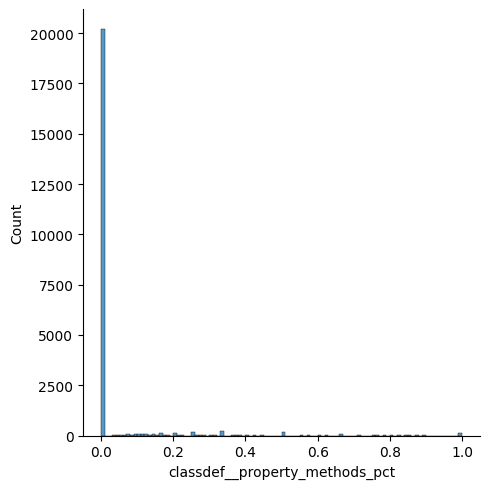

In [95]:
sns.displot(X['classdef__property_methods_pct'], bins=[i / 100 for i in range(0, 101)])

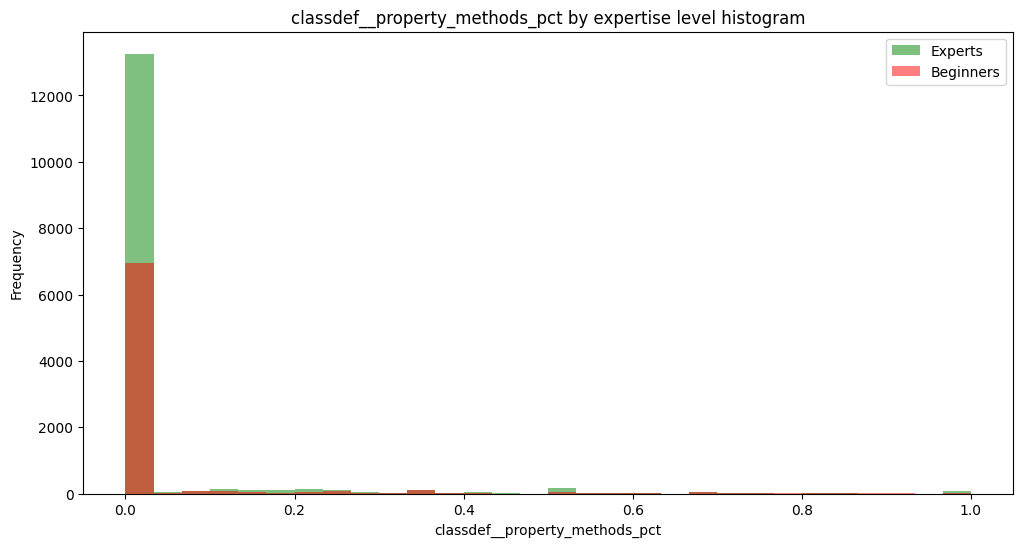

In [96]:
print_histogram(X, 'classdef__property_methods_pct', 'classdef__expertise_level', bins=30, include_all=False)

In [97]:
print_outliers_for_df_column(X, 'classdef__property_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8564213044754201
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2136 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__property_methods_pct. Representando un 9.568% del total de instancias.
+3.0IQR: 2136 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__property_methods_pct. Representando un 9.568% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [98]:
X[X['classdef__property_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.0,2136.000000,2136.000000,2136.000000,2136.000000,...,2136.000000,2136.000000,2136.000000,2136.0,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,0.001873,14.103464,0.098783,10.047285,0.846910,0.0,0.614232,12.555712,0.123578,0.071988,...,0.333404,0.001404,0.928839,0.0,0.003745,0.048689,0.011236,0.006086,0.382022,0.617977
std,0.043244,6.009288,0.322575,10.772639,1.083178,0.0,0.486890,11.802301,0.184022,0.082464,...,0.250471,0.037459,0.257154,0.0,0.061099,0.215268,0.105427,0.077794,0.485996,0.485996
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.004329,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,4.750000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.142857,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,13.000000,0.000000,8.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.052632,...,0.250000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,18.000000,0.000000,12.000000,1.000000,0.0,1.000000,15.000000,0.191244,0.111111,...,0.500000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,37.000000,2.000000,231.000000,45.000000,0.0,1.000000,232.000000,0.975610,0.500000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 90% de las clases no tienen métodos property.

### Variable name_convention (23/23)
Esta variable es de tipo categórica y representa la name_convention del nombre de la clase.

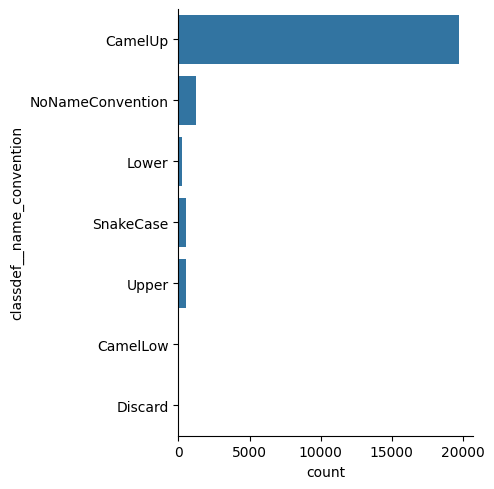

In [99]:
sns.catplot(full_table['classdef__name_convention'], kind="count")

In [100]:
print_frequency_anal_for_cat_var(full_table, 'classdef__name_convention')

La variable classdef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable classdef__name_convention toma el valor de CamelUp en un 88.44% de los items.
La variable classdef__name_convention toma el valor de NoNameConvention en un 5.572% de los items.
La variable classdef__name_convention toma el valor de Upper en un 2.428% de los items.
La variable classdef__name_convention toma el valor de SnakeCase en un 2.302% de los items.
La variable classdef__name_convention toma el valor de Lower en un 1.026% de los items.
La variable classdef__name_convention toma el valor de CamelLow en un 0.1881% de los items.
La variable classdef__name_convention toma el valor de Discard en un 0.04032% de los items.


In [101]:
print_values_usage_for_cat_var(full_table, 'classdef__name_convention', NAMING_CONVENTION_VALUES)

La variable classdef__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### IMPORTANTE
Mas de un 10% no sigue el convenio de nombrado de clases de Python

## Multivariate

Isolation forest algorithm

In [102]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,classdef__name_convention,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,...,classdef__average_stmts_method_body,classdef__type_annotations_pct,classdef__private_methods_pct,classdef__magic_methods_pct,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__expertise_level
715,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
815,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
937,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
2231,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
2323,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
2602,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
3497,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
3615,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
3860,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER
4804,SnakeCase,False,16,0,3,0,False,True,55,0.490909,...,2.666667,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,BEGINNER


### IMPORTANTE
Analizar los 19 resultados obtenidos.

In [103]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
classdef__is_enum_class,19.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
classdef__number_of_characters,19.0,15.210526,3.441236,1.000000,16.000000,16.000000,16.000000,16.000000
classdef__number_of_decorators,19.0,0.105263,0.458831,0.000000,0.000000,0.000000,0.000000,2.000000
classdef__number_of_methods,19.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
classdef__number_of_base_classes,19.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
classdef__has_generic_type_annotations,19.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
classdef__has_doc_string,19.0,0.947368,0.229416,0.000000,1.000000,1.000000,1.000000,1.000000
classdef__body_count,19.0,52.263157,11.929619,3.000000,55.000000,55.000000,55.000000,55.000000
classdef__assignments_pct,19.0,0.465072,0.112622,0.000000,0.490909,0.490909,0.490909,0.490909
classdef__expressions_pct,19.0,0.430622,0.104280,0.000000,0.454545,0.454545,0.454545,0.454545


In [104]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
classdef__is_enum_class,22305.0,0.013360,0.114814,0.0,0.0,0.000000,0.000000,1.0
classdef__number_of_characters,22305.0,13.937772,6.641530,1.0,9.0,13.000000,18.000000,52.0
classdef__number_of_decorators,22305.0,0.142390,0.377459,0.0,0.0,0.000000,0.000000,5.0
classdef__number_of_methods,22305.0,4.140910,6.459155,0.0,1.0,2.000000,5.000000,231.0
classdef__number_of_base_classes,22305.0,0.831338,0.613159,0.0,1.0,1.000000,1.000000,45.0
classdef__has_generic_type_annotations,22305.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
classdef__has_doc_string,22305.0,0.480744,0.499640,0.0,0.0,0.000000,1.000000,1.0
classdef__body_count,22305.0,5.709393,8.447354,1.0,2.0,3.000000,7.000000,618.0
classdef__assignments_pct,22305.0,0.157445,0.298827,0.0,0.0,0.000000,0.181818,1.0
classdef__expressions_pct,22305.0,0.141997,0.224383,0.0,0.0,0.000000,0.250000,1.0
